# Análisis Exploratorio de Datasets en Python

Descripción del Proyecto

El objetivo de este proyecto es realizar un análisis exploratorio de tres datasets proporcionados, los cuales contienen información sobre subvenciones del Ayuntamiento de Barcelona, una encuesta sobre la brecha digital en la ciudad, y accidentes gestionados por la Guardia Urbana. El análisis se enfocará en comprender la estructura de los datos y su contenido, permitiendo visualizar características como columnas presentes, tipos de variables, valores nulos y únicos por columna.

Metodología de Análisis

El análisis de cada dataset se realizará en tres bloques de código separados, uno por dataset, para mantener la claridad y la organización del proceso. Para cada dataset, el análisis incluirá:

Carga de Datos: Se utilizará pandas para cargar cada archivo CSV. El encoding latin1 se ha seleccionado para manejar caracteres especiales, pero se podrá ajustar si es necesario.

Dimensión y Estructura de los Datos:

Se imprimirá la forma del dataset para conocer el número de filas y columnas.
Se listarán todas las columnas presentes en el dataset para entender la estructura y el contenido disponible.
Vista Preliminar de los Datos:

Se mostrará una vista previa de las primeras 5 filas del dataset para obtener una muestra representativa del contenido y formato de los datos.
Tipos de Datos:

Se analizarán los tipos de datos (por ejemplo, int, float, object) de cada columna para identificar posibles necesidades de limpieza y procesamiento de datos.
Valores Nulos:

Se identificarán columnas con valores nulos para determinar si es necesario manejar valores faltantes.
Valores Únicos:

Se imprimirán los valores únicos presentes en cada columna, junto con la cantidad de valores únicos, para identificar posibles categorizaciones o dominios de cada variable.
Cada bloque de código analizará un dataset específico para proporcionar una exploración detallada y organizada de su contenido, con resultados visualmente claros y fáciles de seguir.

# Importación de librerías

In [18]:
pip install bayesian-optimization

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from bayes_opt import BayesianOptimization
import xgboost as xgb
from catboost import CatBoostRegressor

In [20]:
# Primer dataset
path_1 = r"C:\Users\vbarria\Desktop\Hackato\Subvencions_atorgades_AjuntBCN_i_Instituts.csv"

print(f"\n{'='*40}\nAnalyzing dataset: {path_1.split('\\')[-1]}\n{'='*40}")

df = pd.read_csv(path_1, encoding='latin1')

print(f"\n# Dataset Shape (rows, columns): {df.shape}")
print("\n# Columns in the dataset:")
print(df.columns)
print("\n# First 5 rows of the dataset:")
print(df.head())
print("\n# Data types of each column:")
print(df.dtypes)
print("\n# Checking for null values in each column:")
print(df.isnull().sum())
print("\n# Unique values per column:")
for col in df.columns:
    unique_values = df[col].unique()
    print(f"\nColumn '{col}' ({len(unique_values)} unique values):")
    print(unique_values)

print(f"\n{'-'*40}\nAnalysis Completed for: {path_1.split('\\')[-1]}\n{'-'*40}")



Analyzing dataset: Subvencions_atorgades_AjuntBCN_i_Instituts.csv

# Dataset Shape (rows, columns): (61696, 13)

# Columns in the dataset:
Index(['Entitat_Municipal', 'Organ_Gestor', 'Beneficiari', 'NIF_CIF',
       'Tipologia_De_Subvencio', 'Codi_De_Subvencio', 'Objecte',
       'Data_Convocatoria', 'Data_Atorgament', 'Import_Sollicitat',
       'Import_Total_Projecte', 'Import_Atorgat_Inicial',
       'Import_Reintegrat_Total'],
      dtype='object')

# First 5 rows of the dataset:
         Entitat_Municipal                                       Organ_Gestor  \
0  Ajuntament de Barcelona  GerÃ¨ncia Drets de Ciutadania, ParticipaciÃ³ i...   
1  Ajuntament de Barcelona                         GerÃ¨ncia de Drets Socials   
2  Ajuntament de Barcelona  GerÃ¨ncia Drets de Ciutadania, ParticipaciÃ³ i...   
3  Ajuntament de Barcelona                          GerÃ¨ncia Ecologia Urbana   
4  Ajuntament de Barcelona                          GerÃ¨ncia Ecologia Urbana   

                       

# Análisis de los Resultados del Dataset de Subvenciones Otorgadas por el Ayuntamiento de Barcelona

El análisis exploratorio inicial del dataset de subvenciones del Ayuntamiento de Barcelona muestra un total de 61,696 filas y 13 columnas, indicando una base de datos bastante extensa que abarca varios aspectos relacionados con las subvenciones otorgadas. Las columnas presentan información detallada sobre la entidad que concede la subvención, el beneficiario, el tipo de subvención, fechas relacionadas con la convocatoria y el otorgamiento, así como cifras financieras como importes solicitados, concedidos y reintegrados.

Principales observaciones:

Valores Nulos:
La columna Organ_Gestor contiene 6,781 valores nulos, lo cual puede tener un impacto en los análisis relacionados con los organismos responsables de las subvenciones. Además, hay 564 valores nulos en la columna Tipologia_De_Subvencio. Las demás columnas están completas, sin valores nulos. Se debe evaluar si esta columna es vital para el análisis o bien diseñar una estrategia para imputar los nulos.

Tipos de Datos:
La mayoría de las columnas son de tipo object (texto), lo que es esperado para campos como Entitat_Municipal, Beneficiari, y otros campos descriptivos. Las columnas financieras (Import_Sollicitat, Import_Total_Projecte, Import_Atorgat_Inicial, Import_Reintegrat_Total) son de tipo float64, lo que permite un fácil manejo para análisis cuantitativos.

Valores Únicos:
Algunas columnas presentan una alta cantidad de valores únicos, como:

Beneficiari con 25,247 valores únicos, esto quiere decir que deben existir beneficiarios que han accedido a más de una subvención.
Codi_De_Subvencio con 49,175 valores únicos. Esto indica que la mayoría de los registros son únicos a nivel de beneficiario y código de subvención, lo que puede reflejar la diversidad de subvenciones y proyectos.
Campos Financieros:
Las columnas relacionadas con los importes (Import_Sollicitat, Import_Total_Projecte, Import_Atorgat_Inicial, Import_Reintegrat_Total) muestran una alta variabilidad, indicando subvenciones de diferentes tamaños y con diferentes montos aprobados y reintegrados. Este comportamiento puede ser un buen candidato para identificar tendencias y patrones, como distribución de fondos o relación entre importes solicitados y concedidos.

Fechas de Convocatoria y Otorgamiento:
Las columnas Data_Convocatoria y Data_Atorgament presentan diferentes fechas, lo cual permite realizar un análisis temporal sobre la evolución de las subvenciones, fechas de convocatoria, tiempos de espera hasta el otorgamiento, y otros análisis relacionados con el tiempo.

En resumen, el dataset proporciona una variedad de variables que pueden analizarse para obtener insights sobre cómo se otorgan subvenciones, qué organismos las gestionan, qué beneficiarios reciben fondos, y cómo se distribuyen financieramente a lo largo del tiempo.

Ahora haremos el siguiente análisis y procesamiento de data 
- Formateo de Fechas:
Las columnas Data_Convocatoria y Data_Atorgament se convierten al formato datetime para facilitar el análisis temporal. Cualquier error durante la conversión se maneja con coerce.
Se añade una columna adicional Año_Convocatoria que extrae el año de la fecha Data_Convocatoria para facilitar el análisis por años.
- Top 10 Tipologías de Subvenciones:
Se identifica y grafica el top 10 de tipos de subvenciones (Tipologia_De_Subvencio) que han recibido el mayor número de subvenciones. Esto se muestra con un gráfico de barras donde se ordenan las tipologías por su frecuencia.
- Monto Total en Millones de Euros por Cantidad de Subvenciones:
Se identifica a los 10 beneficiarios que recibieron la mayor cantidad de subvenciones en términos de frecuencia.
Se grafica el monto total otorgado a estos beneficiarios (convertido a millones de euros) en un gráfico de barras, para visualizar quiénes son los principales receptores de subvenciones.
- Top 10 de Mayores Cantidades de Euros Recibidas:
Se identifican los 10 beneficiarios que han recibido la mayor cantidad de dinero total en subvenciones.
Se grafica este top 10, mostrando los montos totales recibidos en millones de euros para comparar los mayores beneficiarios financieros.
- Top 10 Tipologías de Subvenciones por Monto Otorgado:
Se calcula el top 10 de tipos de subvenciones (Tipologia_De_Subvencio) que han otorgado la mayor cantidad de dinero.
Se grafica este top 10 en millones de euros para analizar qué tipologías de subvenciones representan el mayor aporte financiero.
-Imputación de Valores Nulos en Organ_Gestor:
Se verifica la relación entre las columnas Organ_Gestor y Entitat_Municipal para encontrar patrones que permitan imputar valores nulos.
Se realiza la imputación de valores nulos en Organ_Gestor utilizando la moda (valor más frecuente) por entidad municipal. Si no existe una relación clara, se utiliza la moda de toda la columna.
Se imprime un resumen de las imputaciones realizadas y la razón de cada una, verificando que todos los valores nulos hayan sido tratados.
-. Gráfico de Tendencia de Subvenciones a lo Largo del Tiempo (Millones de Euros):
Se calcula la suma total de importes otorgados por año y se grafica una línea de tendencia que muestra la evolución de los montos otorgados en millones de euros a lo largo del tiempo.
Esto permite observar si hay patrones de crecimiento, decrecimiento o estacionalidad en la otorgación de subvenciones.
-. Análisis de la Distribución de Datos Numéricos:
Se seleccionan columnas numéricas relacionadas con los importes de subvenciones (Import_Sollicitat, Import_Total_Projecte, Import_Atorgat_Inicial, Import_Reintegrat_Total).
Para cada columna, se genera un histograma con una curva de densidad (KDE) que permite visualizar si los datos siguen una distribución normal o si presentan sesgos.
Este análisis ayuda a identificar la distribución de los importes solicitados, otorgados, y totales de los proyectos.

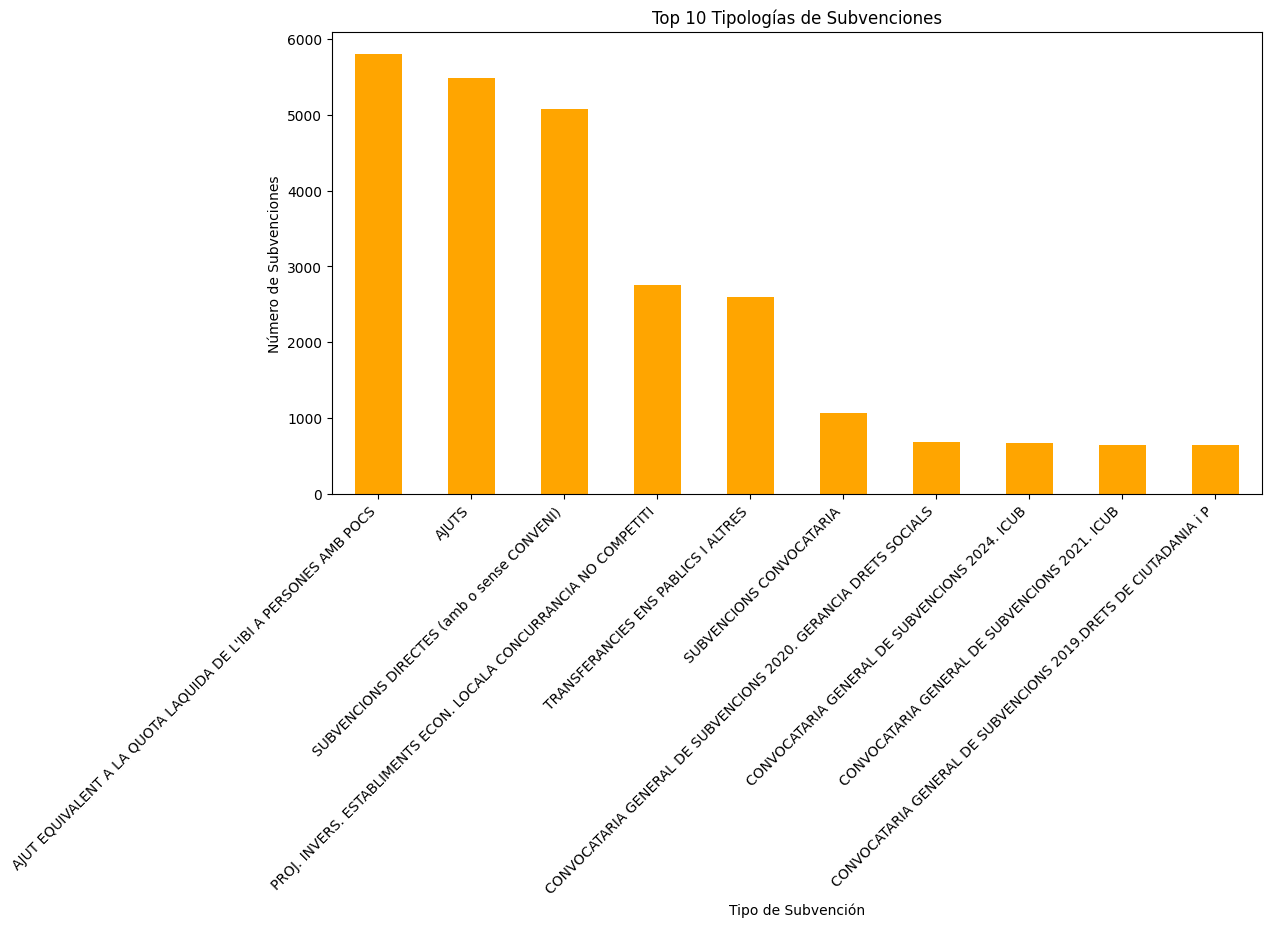

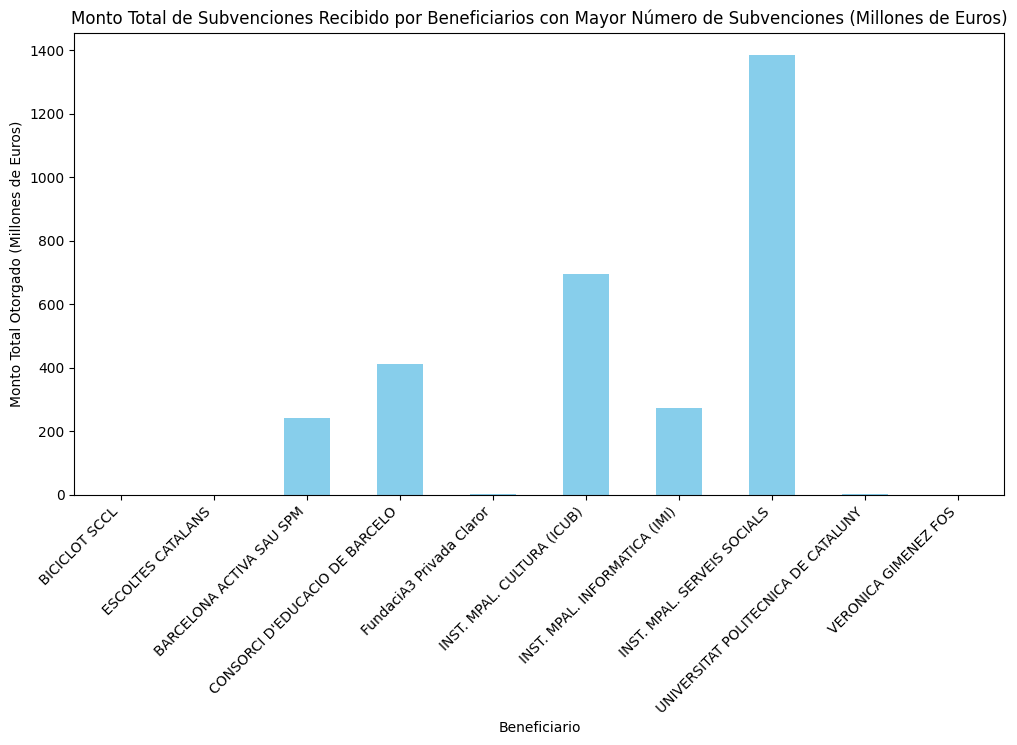

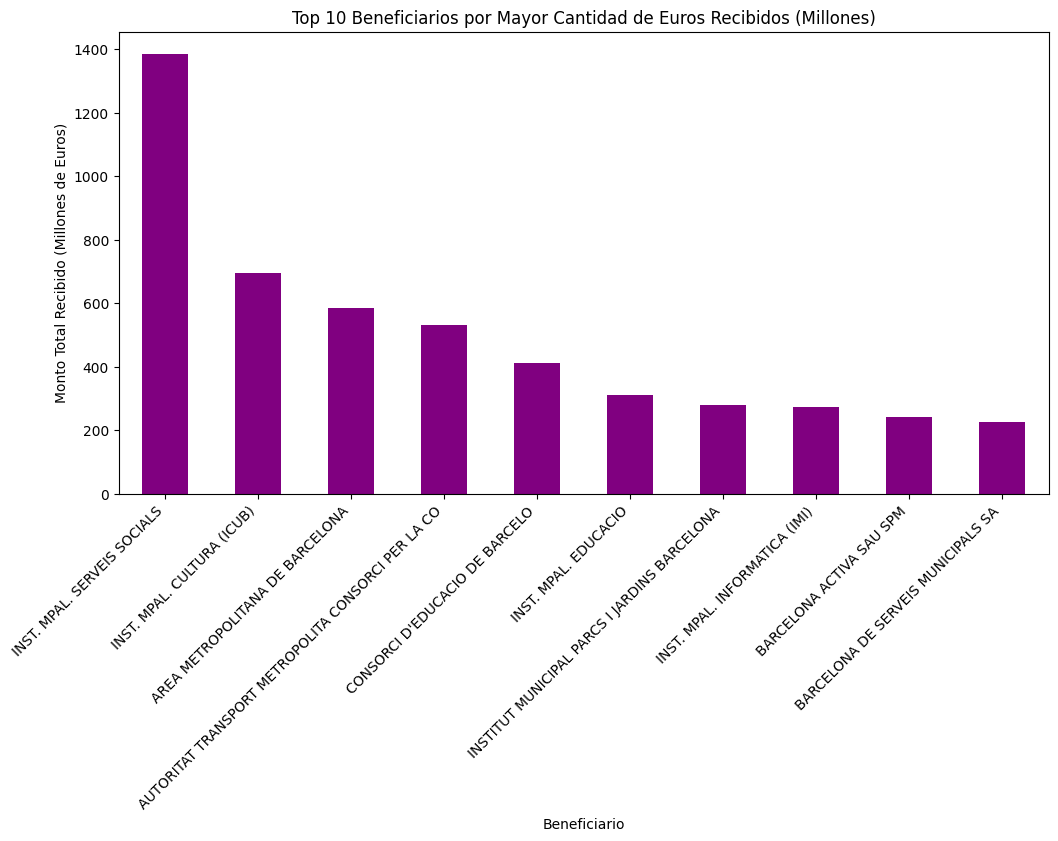

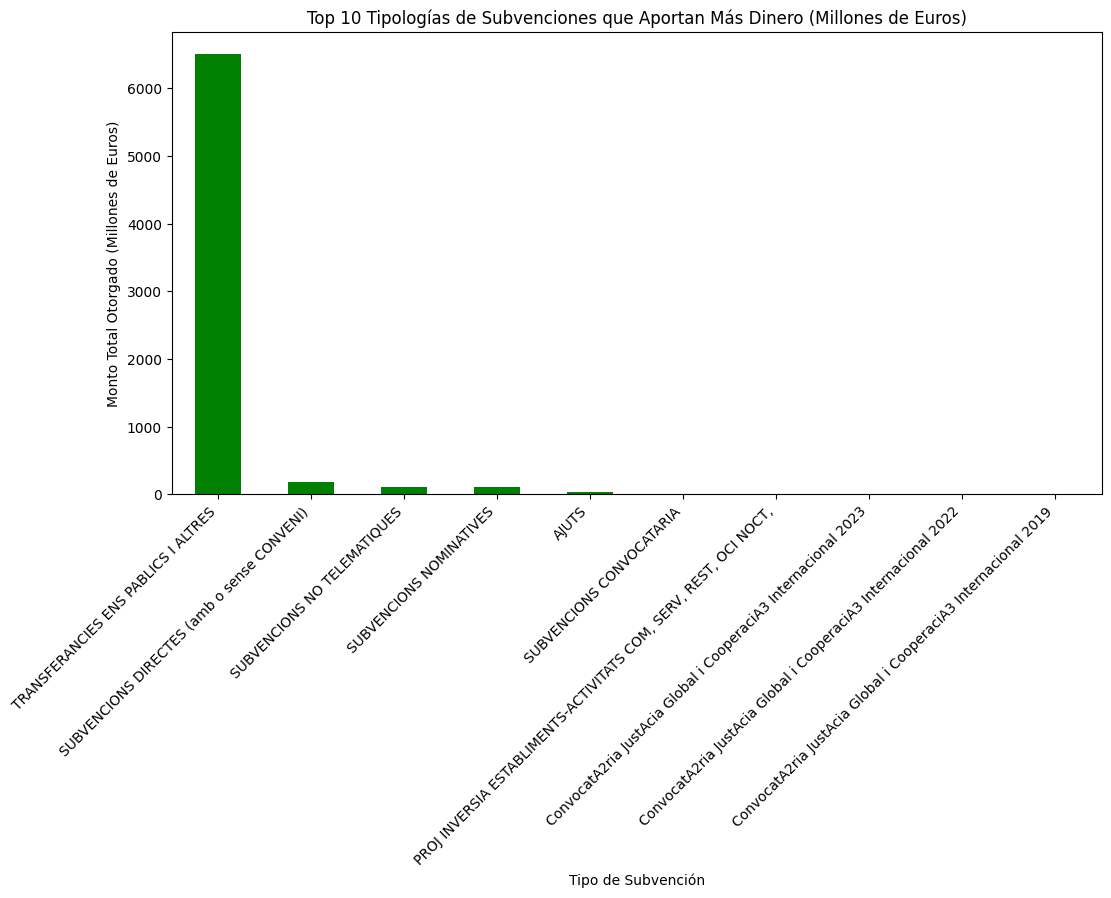


Valores imputados en 'Organ_Gestor' y razones:
{'Index': 640, 'Valor Imputado': 'Sin datos', 'Razón': "Imputado basado en la moda de la entidad municipal 'Institut Municipal d'EducaciA3'"}
{'Index': 641, 'Valor Imputado': 'Sin datos', 'Razón': "Imputado basado en la moda de la entidad municipal 'Institut Municipal d'EducaciA3'"}
{'Index': 642, 'Valor Imputado': 'Sin datos', 'Razón': "Imputado basado en la moda de la entidad municipal 'Institut Municipal d'EducaciA3'"}
{'Index': 643, 'Valor Imputado': 'Sin datos', 'Razón': "Imputado basado en la moda de la entidad municipal 'Institut Municipal d'EducaciA3'"}
{'Index': 644, 'Valor Imputado': 'Sin datos', 'Razón': "Imputado basado en la moda de la entidad municipal 'Institut Municipal d'EducaciA3'"}
{'Index': 645, 'Valor Imputado': 'Sin datos', 'Razón': "Imputado basado en la moda de la entidad municipal 'Institut Municipal d'EducaciA3'"}
{'Index': 646, 'Valor Imputado': 'Sin datos', 'Razón': "Imputado basado en la moda de la entidad mun

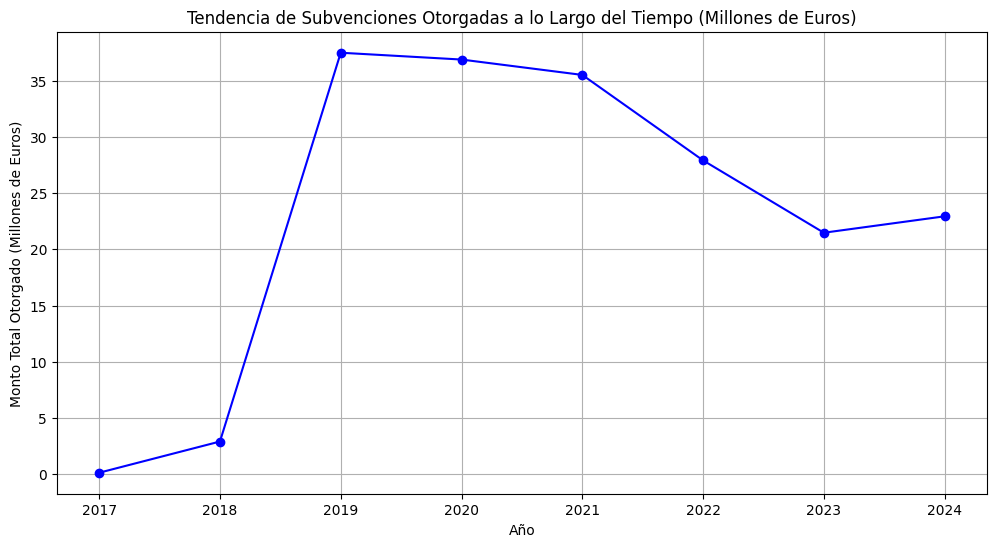

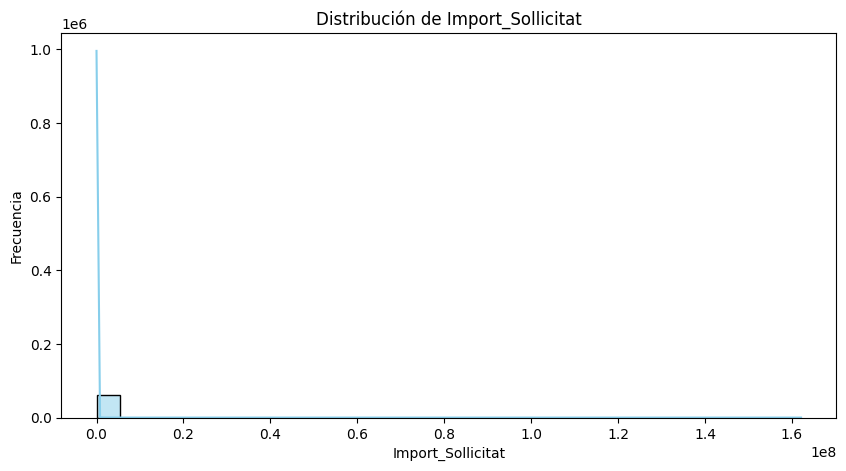

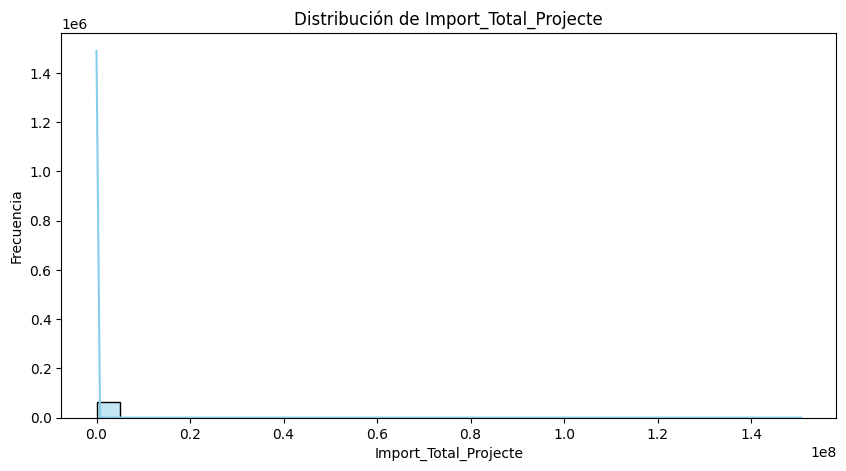

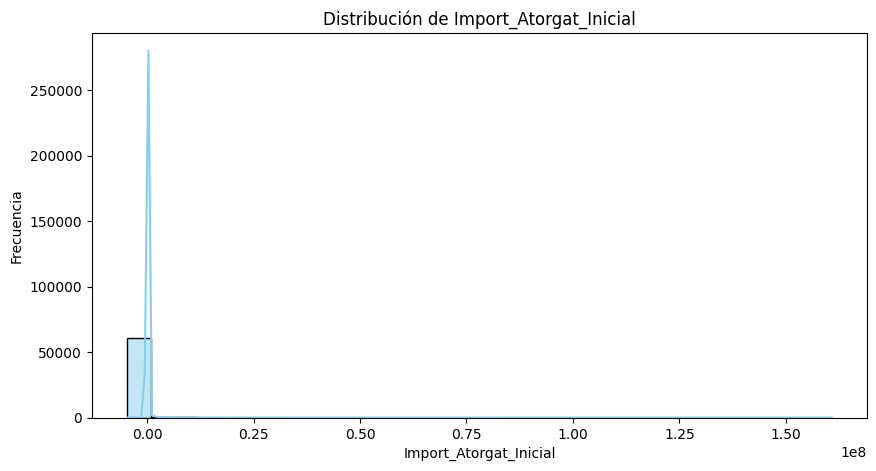

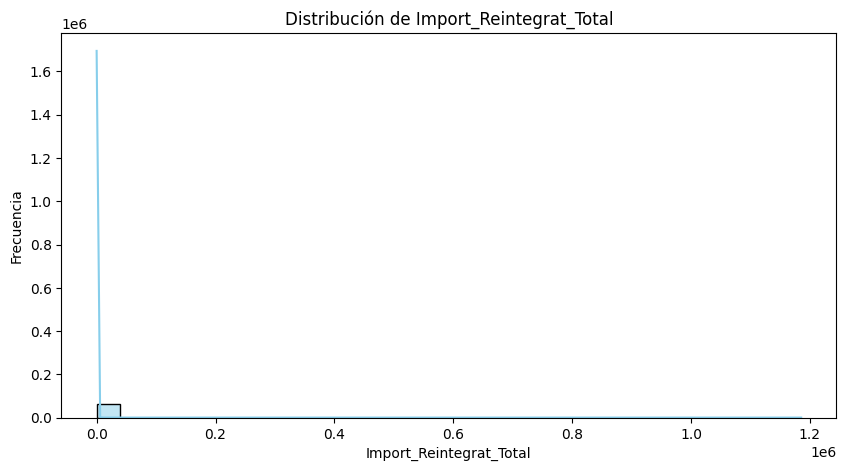

In [21]:

# Limpieza de caracteres especiales que no se cargan correctamente
df.columns = df.columns.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

# Asegurarse de que los datos de fechas estén en formato datetime
df['Data_Convocatoria'] = pd.to_datetime(df['Data_Convocatoria'], errors='coerce', format='%d.%m.%Y')
df['Data_Atorgament'] = pd.to_datetime(df['Data_Atorgament'], errors='coerce', format='%d.%m.%Y')

# Agregar columna de año para análisis temporal
df['Año_Convocatoria'] = df['Data_Convocatoria'].dt.year

# 1. Top 10 de Tipologías de Subvenciones

# Calcular las 10 principales tipologías de subvenciones en cantidad
top_10_tipos = df['Tipologia_De_Subvencio'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
top_10_tipos.plot(kind='bar', color='orange')
plt.title('Top 10 Tipologías de Subvenciones')
plt.xlabel('Tipo de Subvención')
plt.ylabel('Número de Subvenciones')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.show()

# 2. Monto total en millones de euros por cantidad de subvenciones 

# Identificar a los 10 beneficiarios con mayor número de subvenciones
top_beneficiarios = df['Beneficiari'].value_counts().nlargest(10).index

# Calcular el monto total otorgado a estos beneficiarios
monto_por_beneficiario = df[df['Beneficiari'].isin(top_beneficiarios)].groupby('Beneficiari')['Import_Atorgat_Inicial'].sum()

# Convertir el monto a formato de millones de euros y mostrar en un gráfico de barras
plt.figure(figsize=(12, 6))
(monto_por_beneficiario / 1e6).plot(kind='bar', color='skyblue')
plt.title('Monto Total de Subvenciones Recibido por Beneficiarios con Mayor Número de Subvenciones (Millones de Euros)')
plt.xlabel('Beneficiario')
plt.ylabel('Monto Total Otorgado (Millones de Euros)')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.show()

# 3. Top 10 de mayores cantidades de euros recibidas 

# Identificar a los 10 beneficiarios con mayor cantidad total de dinero recibido
top_10_benef_monto = df.groupby('Beneficiari')['Import_Atorgat_Inicial'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
(top_10_benef_monto / 1e6).plot(kind='bar', color='purple')
plt.title('Top 10 Beneficiarios por Mayor Cantidad de Euros Recibidos (Millones)')
plt.xlabel('Beneficiario')
plt.ylabel('Monto Total Recibido (Millones de Euros)')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.show()

# 4. Top 10 Tipologías de Subvenciones que Aportan Más Dinero 

# Calcular el top 10 de tipologías de subvenciones con mayor monto total otorgado
top_10_tipos_monto = df.groupby('Tipologia_De_Subvencio')['Import_Atorgat_Inicial'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
(top_10_tipos_monto / 1e6).plot(kind='bar', color='green')
plt.title('Top 10 Tipologías de Subvenciones que Aportan Más Dinero (Millones de Euros)')
plt.xlabel('Tipo de Subvención')
plt.ylabel('Monto Total Otorgado (Millones de Euros)')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.show()

# 5. Gráfico de imputación de nulos en 'Organ_Gestor'

# Verificar relación entre 'Organ_Gestor' y 'Entitat_Municipal'
relacion = df.groupby('Entitat_Municipal')['Organ_Gestor'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Sin datos')

# Guardar una lista de cambios para reportar después
imputaciones = []

# Imputar valores nulos basados en la entidad municipal si hay coincidencias
for index, row in df[df['Organ_Gestor'].isnull()].iterrows():
    entidad = row['Entitat_Municipal']
    valor_imputado = relacion.get(entidad)
    
    # Razón para la imputación
    if pd.notna(valor_imputado):
        razon = f"Imputado basado en la moda de la entidad municipal '{entidad}'"
    else:
        valor_imputado = df['Organ_Gestor'].mode()[0]
        razon = "Imputado basado en la moda de toda la columna 'Organ_Gestor'"
    
    imputaciones.append({'Index': index, 'Valor Imputado': valor_imputado, 'Razón': razon})
    
    # Realizar la imputación
    df.at[index, 'Organ_Gestor'] = valor_imputado

# Mostrar valores imputados y razones
print("\nValores imputados en 'Organ_Gestor' y razones:")
for imp in imputaciones[:10]:  # Mostrar solo los primeros 10 para brevedad
    print(imp)

print(f"\nTotal de valores imputados: {len(imputaciones)}")

# Verificar si se han imputado correctamente los valores
print("\nValores nulos después de imputación en 'Organ_Gestor':")
print(df['Organ_Gestor'].isnull().sum())

# 6. Gráfico de tendencia de subvenciones a lo largo del tiempo (millones de euros)

# Calcular el monto total otorgado por año
monto_por_ano = df.groupby('Año_Convocatoria')['Import_Atorgat_Inicial'].sum()

plt.figure(figsize=(12, 6))
(monto_por_ano / 1e6).plot(kind='line', marker='o', color='blue')
plt.title('Tendencia de Subvenciones Otorgadas a lo Largo del Tiempo (Millones de Euros)')
plt.xlabel('Año')
plt.ylabel('Monto Total Otorgado (Millones de Euros)')
plt.grid(True)
plt.show()

# 7. Análisis de la distribución de datos numéricos 

# Seleccionar columnas numéricas relevantes
numerical_cols = ['Import_Sollicitat', 'Import_Total_Projecte', 'Import_Atorgat_Inicial', 'Import_Reintegrat_Total']

# Graficar distribuciones
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()


Interpretación de los Gráficos
1. Top 10 Tipologías de Subvenciones por Número de Subvenciones
El gráfico muestra las 10 principales tipologías de subvenciones por su frecuencia. La mayor parte de las subvenciones otorgadas corresponde a "AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A PERSONES AMB POCS", seguida de "AJUTS" y "SUBVENCIONS DIRECTES (amb o sense CONVENI)". Esto indica que estos tipos de subvenciones tienen una mayor prevalencia en el total de subvenciones otorgadas por el Ayuntamiento de Barcelona.

2. Monto Total Recibido por Beneficiarios con Mayor Número de Subvenciones
Aquí se observa que el beneficiario "INST. MPAL. SERVEIS SOCIALS" destaca significativamente al recibir la mayor cantidad de subvenciones en términos monetarios (más de 1.4 mil millones de euros). Otros beneficiarios importantes incluyen "CONSORCI D'EDUCACIO DE BARCELO" y "INST. MPAL. CULTURA (ICUB)", pero con montos considerablemente menores. Esto sugiere una concentración del financiamiento en algunas organizaciones específicas.

3. Top 10 Beneficiarios por Mayor Cantidad de Euros Recibidos
Este gráfico confirma que "INST. MPAL. SERVEIS SOCIALS" es el principal receptor de subvenciones en cuanto a montos totales, seguido por "INST. MPAL. CULTURA (ICUB)" y "AREA METROPOLITANA DE BARCELONA". La diferencia entre el primer beneficiario y el resto es muy marcada, lo que denota una asignación prioritaria de fondos hacia actividades de servicios sociales.

4. Top 10 Tipologías de Subvenciones que Aportan Más Dinero
La categoría de subvención que más dinero aporta es "TRANSFERÀNCIES ENS PÚBLICS I ALTRES", con un monto significativamente mayor en comparación con las otras tipologías. La diferencia es tan amplia que el resto de las categorías se muestra con aportes relativamente pequeños, sugiriendo una distribución financiera muy concentrada en esta tipología específica.

5. Tendencia de Subvenciones Otorgadas a lo Largo del Tiempo
El gráfico de tendencia muestra que el monto total de subvenciones otorgadas tuvo un incremento significativo en 2019, seguido de una disminución progresiva a partir de 2020. Esto puede deberse a políticas de reducción de gastos, ajustes presupuestarios, o la afectación financiera derivada de eventos como la pandemia de COVID-19.

6. Distribución de Import_Sollicitat
La distribución de importes solicitados presenta un fuerte sesgo hacia la izquierda, con la mayoría de los valores cercanos a cero. Esto sugiere que la mayor parte de las solicitudes son por montos pequeños, mientras que hay unos pocos casos con importes muy elevados.

7. Distribución de Import_Total_Projecte
Al igual que el Import_Sollicitat, la distribución del Import_Total_Projecte está fuertemente sesgada hacia valores bajos. Esto indica que los proyectos financiados tienden a tener costos totales relativamente bajos, aunque existen proyectos con presupuestos elevados que son menos frecuentes.

8. Distribución de Import_Atorgat_Inicial
La distribución del importe inicialmente otorgado sigue un patrón similar a los gráficos anteriores, con una gran mayoría de subvenciones pequeñas y algunos casos de montos elevados. Esto implica que el financiamiento está más enfocado en distribuir pequeñas cantidades entre muchos proyectos en lugar de concentrar grandes fondos en unos pocos.

9. Distribución de Import_Reintegrat_Total
La distribución de importes reintegrados también presenta un sesgo fuerte hacia montos bajos, lo que sugiere que la devolución de fondos no otorgados es rara y, en su mayoría, ocurre por valores pequeños. Esto puede reflejar un eficiente uso de las subvenciones por parte de los beneficiarios.

In [35]:
# Crear una copia del dataset solo con las variables numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Mostrar la correlación de 'Import_Sollicitat' con todas las variables
print("Correlación de 'Import_Sollicitat' con otras variables:")
print(correlation_matrix['Import_Sollicitat'].sort_values(ascending=False))


Correlación de 'Import_Sollicitat' con otras variables:
Import_Sollicitat          1.000000
Import_Atorgat_Inicial     0.870502
Monto_Total                0.870502
Import_Total_Projecte      0.347133
Ano_Convocatoria           0.089764
Año_Convocatoria           0.089764
Año_Atorgament             0.085521
Dia_Convocatoria           0.080443
Import_Reintegrat_Total    0.068669
Dia_Atorgament             0.001142
Mes_Atorgament            -0.036145
Mes_Convocatoria          -0.066762
Name: Import_Sollicitat, dtype: float64


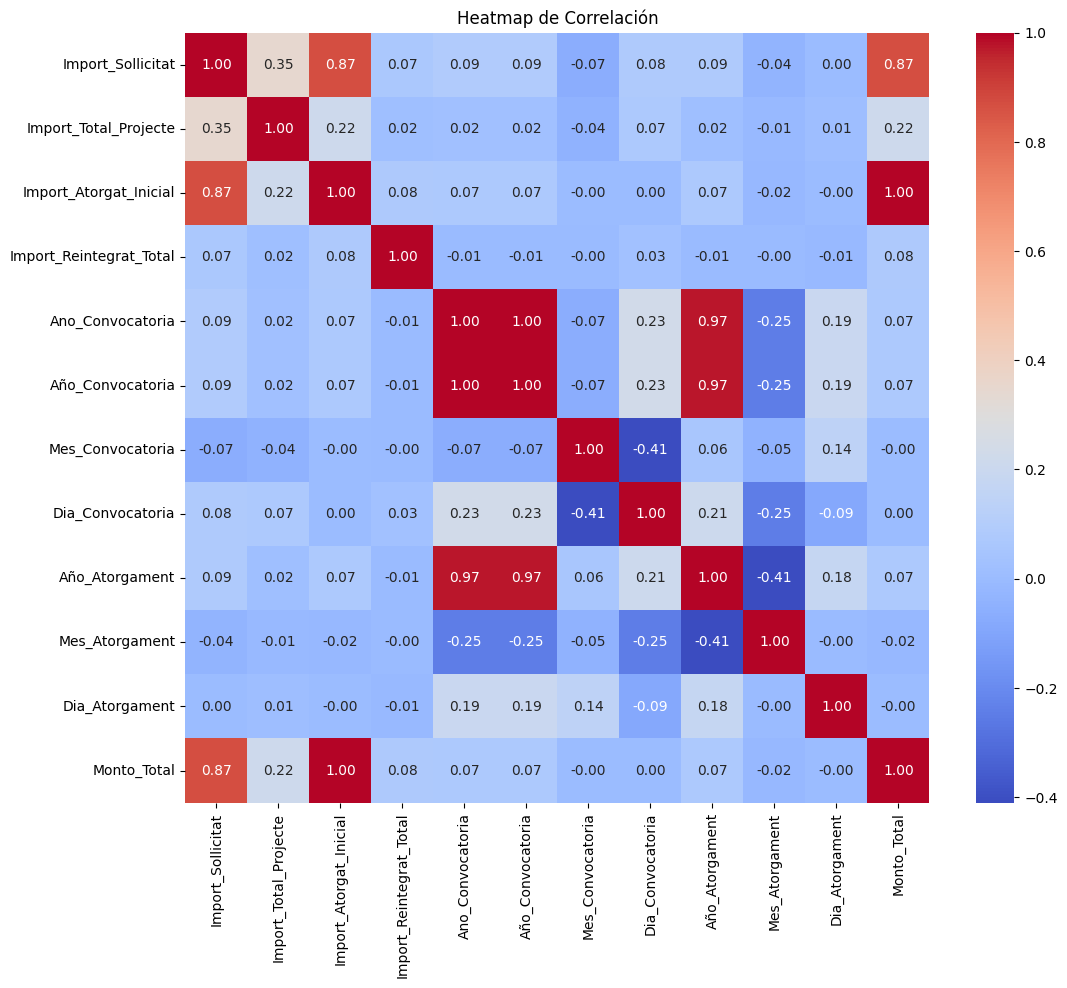

In [36]:
# Configurar la figura del heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

plt.title('Heatmap de Correlación')
plt.show()


Observaciones Principales:
Import_Sollicitat y Import_Atorgat_Inicial:

La correlación entre Import_Sollicitat y Import_Atorgat_Inicial es alta (0.87). Esto indica que existe una fuerte relación entre el monto solicitado y el monto otorgado inicialmente, lo cual es esperado, ya que el valor otorgado generalmente depende del monto solicitado.
Esta alta correlación sugiere que Import_Sollicitat puede aportar una fuerte señal predictiva al modelo para Import_Atorgat_Inicial, aunque también puede aumentar el riesgo de colinealidad.
Correlación de Import_Sollicitat con Import_Total_Projecte:

La correlación es moderada (0.35), lo que indica que existe una relación, pero no es tan fuerte como con el objetivo (Import_Atorgat_Inicial). Esto sugiere que estas variables no capturan exactamente la misma información.
Import_Atorgat_Inicial y Monto_Total:

Hay una correlación perfecta de 1.0 entre Import_Atorgat_Inicial y Monto_Total. Esto indica que estas dos variables son esencialmente equivalentes en cuanto a contenido, por lo que una de ellas debería eliminarse para evitar redundancia en el modelo.
Variables Temporales (Año/Mes/Día de Convocatoria/Atorgamiento):

Las variables como Año_Convocatoria, Mes_Convocatoria, Día_Convocatoria, y sus contrapartes de atorgamiento (Año_Atorgament, Mes_Atorgament, Día_Atorgament) muestran muy poca correlación con Import_Sollicitat y Import_Atorgat_Inicial.
Esto sugiere que las fechas específicas de convocatoria y otorgamiento pueden no ser determinantes en el monto otorgado, aunque pueden tener un impacto temporal que no se refleja de forma lineal.
Import_Reintegrat_Total:

La correlación de Import_Reintegrat_Total con las otras variables, incluyendo Import_Sollicitat y Import_Atorgat_Inicial, es muy baja (cercana a 0). Esto indica que los montos reintegrados no están directamente relacionados con los montos solicitados o otorgados, y esta variable podría tener un papel muy específico en algunos casos.
Recomendación para el Modelo:
Retener Import_Sollicitat: Dado que Import_Sollicitat tiene una alta correlación con Import_Atorgat_Inicial, es una variable relevante y debe mantenerse en el modelo ya que aporta información predictiva significativa.

Eliminar Redundancias (Monto_Total o Import_Atorgat_Inicial):

Dado que hay una correlación perfecta entre Import_Atorgat_Inicial y Monto_Total, se eliminará una de las dos para evitar duplicación de información en el modelo. Probablemente es mejor mantener Import_Atorgat_Inicial, ya que es el objetivo principal de predicción.

Análisis de Variables Temporales:

Las variables temporales tienen baja correlación, lo cual no significa necesariamente que no sean útiles

Las demás variables tienen correlaciones bajas con el objetivo, lo que sugiere que su poder predictivo puede ser limitado.

# Descripción del Objetivo de Predicción

El objetivo es desarrollar un modelo predictivo para prever el monto total de subvenciones otorgadas (en millones de euros) para el año 2025, utilizando un conjunto de datos históricos de subvenciones. Además, el modelo también debe identificar cuáles serán las convocatorias más relevantes para dicho año, basándose en la tendencia de los datos y las características de las subvenciones (como el tipo de subvención, entidad que las otorga, entre otros). Se utilizará un enfoque de múltiples modelos (RandomForest, XGBoost, CatBoost, Regresión Lineal) para seleccionar el que mejor desempeño tenga, y posteriormente se optimizarán los hiperparámetros utilizando la optimización bayesiana.

1. Importación de Librerías y Carga de Datos

En esta primera sección se realiza una limpieza básica de los caracteres especiales.

In [22]:

# Limpieza de caracteres especiales
df.columns = df.columns.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')


2. Procesamiento de Fechas y Filtrado de Valores Negativos
Descripción:
Se procesan las fechas para extraer información relevante como el año, mes y día de la convocatoria y otorgamiento de subvenciones. Posteriormente, se eliminan todas las filas con valores negativos en las columnas numéricas, ya que solo se buscan valores positivos para la predicción.

In [23]:
# Asegurarse de que los datos de fechas estén en formato datetime
df['Data_Convocatoria'] = pd.to_datetime(df['Data_Convocatoria'], errors='coerce', format='%d.%m.%Y')
df['Data_Atorgament'] = pd.to_datetime(df['Data_Atorgament'], errors='coerce', format='%d.%m.%Y')

# Crear nuevas columnas con información temporal
df['Año_Convocatoria'] = df['Data_Convocatoria'].dt.year
df['Mes_Convocatoria'] = df['Data_Convocatoria'].dt.month
df['Dia_Convocatoria'] = df['Data_Convocatoria'].dt.day

df['Año_Atorgament'] = df['Data_Atorgament'].dt.year
df['Mes_Atorgament'] = df['Data_Atorgament'].dt.month
df['Dia_Atorgament'] = df['Data_Atorgament'].dt.day

# Eliminar las columnas originales de fechas
df = df.drop(columns=['Data_Convocatoria', 'Data_Atorgament'])

# Filtrar valores negativos
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df = df[(df[numerical_cols] >= 0).all(axis=1)]


3. Selección de Características (X) y Objetivo (y)
Descripción:
Se definen las variables independientes (X) y la variable objetivo (y) para el modelo de predicción. Además, se realiza una codificación de variables categóricas utilizando LabelEncoder.

In [24]:
# Selección de características (X) y objetivo (y)
X = df.drop(columns=['Import_Atorgat_Inicial'])  # Ajusta esta columna según la columna objetivo real
y = df['Import_Atorgat_Inicial']

# Verificar y transformar columnas categóricas en X
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])


4. División de Datos para Entrenamiento y Prueba
Descripción:
Se divide el conjunto de datos en datos de entrenamiento y datos de prueba, con un 80% para entrenamiento y 20% para prueba.

In [25]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


5. Torneo de Modelos y Evaluación
Descripción:
Se entrena y evalúa cada modelo (RandomForest, LinearRegression, XGBoost, CatBoost) para comparar su desempeño y seleccionar el que tenga el mejor R^2 Score.

In [26]:
# Lista de modelos para el torneo
models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "LinearRegression": LinearRegression(),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42)
}

# Evaluación de cada modelo
best_model_name = None
best_r2_score = -np.inf

print("\nEvaluación del torneo de modelos:")
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - R^2 Score: {r2:.4f}")
    
    if r2 > best_r2_score:
        best_r2_score = r2
        best_model_name = model_name

print(f"\nMejor modelo seleccionado: {best_model_name} con R^2 Score: {best_r2_score:.4f}")



Evaluación del torneo de modelos:
RandomForest - R^2 Score: 0.9065
LinearRegression - R^2 Score: 0.4172
XGBoost - R^2 Score: 0.8606
CatBoost - R^2 Score: 0.8829

Mejor modelo seleccionado: RandomForest con R^2 Score: 0.9065


6. Optimización Bayesiana de Hiperparámetros
Descripción:
Se realiza la optimización bayesiana de hiperparámetros del modelo que tuvo mejor desempeño en el torneo.

In [27]:
# Definir función para optimización de hiperparámetros
def optimize_model(**params):
    if best_model_name == "RandomForest":
        model = RandomForestRegressor(
            n_estimators=int(params.get('n_estimators', 100)),
            max_depth=int(params.get('max_depth', 10)),
            min_samples_split=int(params.get('min_samples_split', 2)),
            min_samples_leaf=int(params.get('min_samples_leaf', 1)),
            random_state=42
        )
    elif best_model_name == "XGBoost":
        model = xgb.XGBRegressor(
            objective='reg:squarederror',
            n_estimators=int(params.get('n_estimators', 100)),
            max_depth=int(params.get('max_depth', 6)),
            learning_rate=params.get('learning_rate', 0.1),
            subsample=params.get('subsample', 1.0),
            random_state=42
        )
    elif best_model_name == "CatBoost":
        model = CatBoostRegressor(
            iterations=int(params.get('iterations', 100)),
            depth=int(params.get('depth', 6)),
            learning_rate=params.get('learning_rate', 0.1),
            random_state=42,
            verbose=0
        )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return r2_score(y_test, y_pred)

# Espacios de búsqueda de hiperparámetros
pbounds_rf = {
    'n_estimators': (50, 300),
    'max_depth': (5, 50),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20)
}

pbounds_xgb = {
    'n_estimators': (50, 300),
    'max_depth': (3, 10),
    'learning_rate': (0.01, 0.3),
    'subsample': (0.5, 1)
}

pbounds_cat = {
    'iterations': (100, 500),
    'depth': (4, 10),
    'learning_rate': (0.01, 0.3)
}

if best_model_name == "RandomForest":
    pbounds = pbounds_rf
elif best_model_name == "XGBoost":
    pbounds = pbounds_xgb
else:  # CatBoost
    pbounds = pbounds_cat

# Configuración de la optimización bayesiana
optimizer = BayesianOptimization(
    f=optimize_model,
    pbounds=pbounds,
    random_state=42,
    verbose=2
)

# Realizar optimización
optimizer.maximize(init_points=5, n_iter=20)

# Imprimir los mejores parámetros encontrados
print("\nMejores hiperparámetros encontrados:")
print(optimizer.max)


|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------
| 1         | 0.8596    | 21.85     | 19.06     | 15.18     | 199.7     |
| 2         | 0.7894    | 12.02     | 3.964     | 3.046     | 266.5     |
| 3         | 0.8679    | 32.05     | 14.45     | 2.371     | 292.5     |
| 4         | 0.8433    | 42.46     | 5.034     | 5.273     | 95.85     |
| 5         | 0.8713    | 18.69     | 10.97     | 9.775     | 122.8     |
| 6         | 0.8712    | 17.34     | 10.51     | 9.611     | 122.8     |
| 7         | 0.8699    | 17.61     | 14.38     | 11.96     | 150.9     |
| 8         | 0.8573    | 50.0      | 20.0      | 20.0      | 300.0     |
| 9         | 0.91      | 43.58     | 1.0       | 2.0       | 149.4     |
| 10        | 0.9116    | 50.0      | 1.0       | 2.0       | 169.2     |
| 11        | 0.9057    | 50.0      | 1.0       | 20.0      | 157.5     |
| 12        | 0.8595    | 50.0      | 

7. Ajuste Final del Modelo con los Mejores Hiperparámetros
Descripción:
En esta sección, tomaremos los mejores parámetros obtenidos y ajustaremos el modelo con ellos. Posteriormente, evaluaremos su rendimiento en el conjunto de prueba y haremos predicciones para el año 2025.

In [28]:
# Ajustar el modelo RandomForest con los mejores parámetros
best_params = optimizer.max['params']
model_final = RandomForestRegressor(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    random_state=42
)

# Entrenar el modelo final
model_final.fit(X_train, y_train)

# Evaluación final del modelo optimizado
y_pred_final = model_final.predict(X_test)
print("\nEvaluación final del Modelo RandomForest Optimizado:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_final):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_final):.4f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_final):.4f}")



Evaluación final del Modelo RandomForest Optimizado:
Mean Absolute Error (MAE): 1222.0172
Mean Squared Error (MSE): 19317164.7654
R^2 Score: 0.9118


8. Predicciones para el Año 2025 Usando RandomForest
Descripción:
Usaremos el modelo ajustado de RandomForest con los mejores hiperparámetros para predecir el monto total de subvenciones para el año 2025.

In [29]:
# Predicción para el año 2025
X_2025 = X_test.copy()
X_2025['Año_Convocatoria'] = 2025  # Ajusta esta columna si es necesario para la predicción de 2025

y_pred_2025 = model_final.predict(X_2025)
print("\nPredicción del monto total de subvenciones para el año 2025:")
print(y_pred_2025)

# Mostrar estadísticas básicas de la predicción
print(f"\nMonto total de subvenciones previsto para 2025 (en millones de euros): {np.sum(y_pred_2025) / 1e6:.2f}")
print(f"Promedio de subvenciones previstas: {np.mean(y_pred_2025):.2f}")
print(f"Desviación estándar de subvenciones previstas: {np.std(y_pred_2025):.2f}")



Predicción del monto total de subvenciones para el año 2025:
[ 2714.46308704  2222.34018345 11826.48639535 ... 21619.56008306
  4212.84741099  5936.62790698]

Monto total de subvenciones previsto para 2025 (en millones de euros): 36.80
Promedio de subvenciones previstas: 5442.54
Desviación estándar de subvenciones previstas: 13592.24


9. Visualización de las Predicciones para el Año 2025
Descripción:
Esta sección generará gráficos para mostrar el monto total de subvenciones previsto para 2025, comparaciones con años anteriores, y distribución de predicciones.

9.1. Evolución del Monto Total de Subvenciones a lo Largo de los Años
Este gráfico mostrará la tendencia de las subvenciones a lo largo de los años, incluyendo la predicción para 2025.

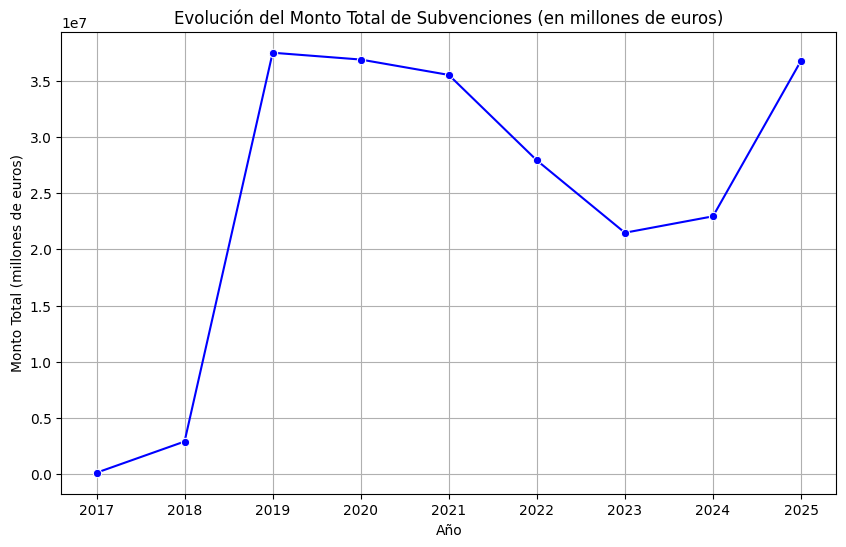

In [30]:

# Calcular el monto total de subvenciones por año
df['Monto_Total'] = y
total_por_año = df.groupby('Año_Convocatoria')['Monto_Total'].sum()

# Añadir la predicción para 2025 al gráfico
total_por_año[2025] = y_pred_2025.sum()

# Crear gráfico de evolución de subvenciones
plt.figure(figsize=(10, 6))
sns.lineplot(x=total_por_año.index, y=total_por_año.values, marker='o', color='blue')
plt.title('Evolución del Monto Total de Subvenciones (en millones de euros)')
plt.xlabel('Año')
plt.ylabel('Monto Total (millones de euros)')
plt.grid(True)
plt.show()


9.2. Distribución de las Predicciones para 2025
Visualizar la distribución de los valores de subvenciones previstos para el año 2025.

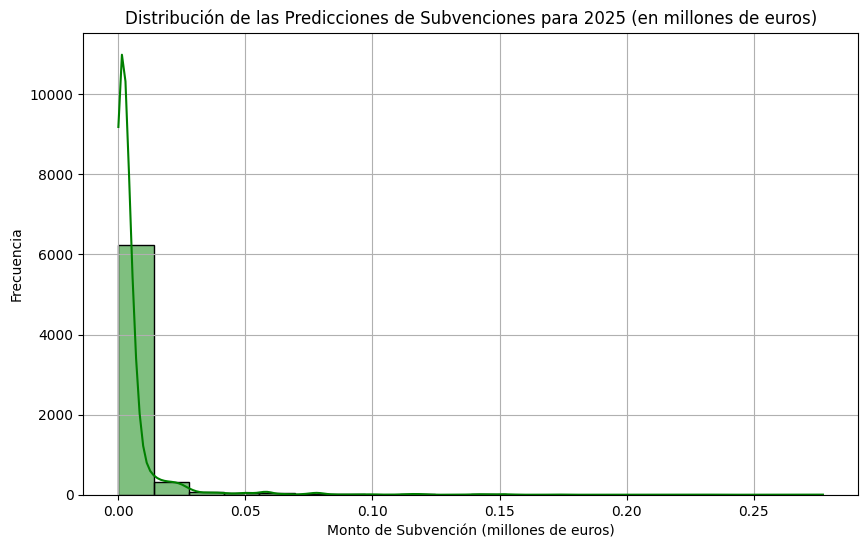

In [31]:
# Crear gráfico de distribución de predicciones para 2025
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_2025 / 1e6, bins=20, kde=True, color='green')
plt.title('Distribución de las Predicciones de Subvenciones para 2025 (en millones de euros)')
plt.xlabel('Monto de Subvención (millones de euros)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


9.3. Comparación de Predicciones vs. Valores Reales en el Conjunto de Prueba
Este gráfico comparará las predicciones del modelo optimizado con los valores reales del conjunto de prueba.

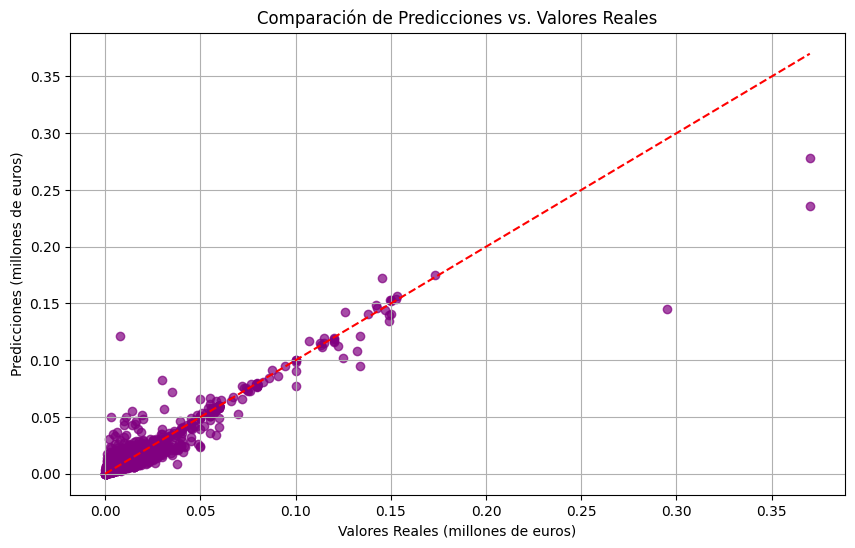

In [32]:
# Comparación de predicciones vs. valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test / 1e6, y_pred_final / 1e6, alpha=0.7, color='purple')
plt.plot([min(y_test / 1e6), max(y_test / 1e6)], [min(y_test / 1e6), max(y_test / 1e6)], color='red', linestyle='--')
plt.title('Comparación de Predicciones vs. Valores Reales')
plt.xlabel('Valores Reales (millones de euros)')
plt.ylabel('Predicciones (millones de euros)')
plt.grid(True)
plt.show()


# Interpretación resultados

1. Evolución del Monto Total de Subvenciones (2017-2025)
Este gráfico de líneas muestra cómo ha evolucionado el monto total de subvenciones en millones de euros a lo largo del tiempo, incluyendo la predicción para 2025. La predicción muestra un incremento notable para 2025, acercándose a los niveles observados en 2019, después de una tendencia descendente entre 2020 y 2023. Esto indica que, según las tendencias y datos disponibles, se espera que el monto total de subvenciones aumente considerablemente para 2025.

2. Distribución de las Predicciones de Subvenciones para 2025
El histograma con la densidad de kernel sobrepuesta muestra la distribución de las subvenciones previstas para 2025 en millones de euros. La mayoría de las subvenciones predichas están muy cerca de 0 (es decir, son cantidades relativamente pequeñas), lo que sugiere que hay una gran cantidad de subvenciones de menor valor, mientras que unas pocas subvenciones tienen valores más altos.

3. Comparación de Predicciones vs. Valores Reales
El gráfico de dispersión muestra la relación entre los valores reales y los valores predichos por el modelo para el conjunto de datos de prueba. La línea roja indica la perfecta correspondencia entre predicciones y valores reales (línea y = x). La mayoría de los puntos siguen esta línea, lo que sugiere que el modelo está funcionando bien, con algunas desviaciones notables en valores más altos. Las predicciones tienden a ser precisas para subvenciones de menor valor, mientras que hay mayor dispersión en los valores altos, lo que podría sugerir cierta dificultad del modelo para predecir subvenciones de mayor cuantía.

Conclusiones generales:
Predicción positiva para 2025: La tendencia al alza para 2025 indica un posible repunte en el monto total de subvenciones, volviendo a valores cercanos a los máximos históricos de 2019.

Subvenciones predominantemente pequeñas: La distribución muestra que la mayoría de las subvenciones tienen un monto pequeño. Esto es consistente con la práctica común de otorgar muchas subvenciones de menor valor y solo unas pocas de gran valor.

Buena capacidad predictiva del modelo: La comparación entre valores reales y predichos indica que el modelo RandomForest optimizado tiene un buen rendimiento, especialmente en el rango de subvenciones de menor valor. Sin embargo, la mayor dispersión en valores altos sugiere que podría haber espacio para mejorar la predicción de subvenciones más significativas.


Top 10 Características más Importantes:
                   Feature  Importance
7        Import_Sollicitat    0.899992
0        Entitat_Municipal    0.031598
4   Tipologia_De_Subvencio    0.013971
8    Import_Total_Projecte    0.009397
13        Dia_Convocatoria    0.008762
6                  Objecte    0.006090
2              Beneficiari    0.005532
12        Mes_Convocatoria    0.005425
3                  NIF_CIF    0.005151
5        Codi_De_Subvencio    0.004852


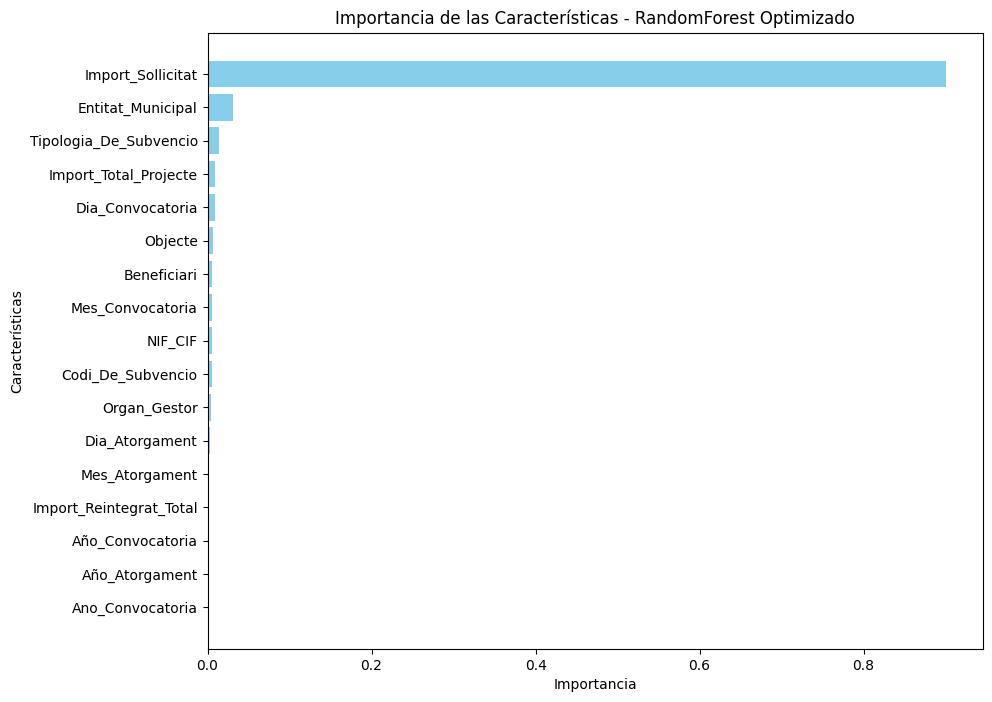

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular la importancia de las características usando el modelo RandomForest entrenado y optimizado
importances = model_final.feature_importances_
features = X_train.columns

# Crear un DataFrame para organizar la importancia de las características
importances_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Mostrar las 10 características más importantes
print("\nTop 10 Características más Importantes:")
print(importances_df.head(10))

# Graficar la importancia de las características
plt.figure(figsize=(10, 8))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características - RandomForest Optimizado')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar las características más importantes en la parte superior
plt.show()



La gráfica muestra la importancia de las características en el modelo optimizado de RandomForest. La característica más influyente es Import_Sollicitat, seguida por Entitat_Municipal y Tipologia_De_Subvencio. Esto sugiere que el monto solicitado (Import_Sollicitat) tiene el mayor peso a la hora de predecir el monto de la subvención, mientras que la entidad municipal y el tipo de subvención también contribuyen significativamente.